**Analisis inicial de la relacion de las columnas de la base de datos**


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


***Lectura de datos***

In [ ]:
df = pd.read_csv("TrainingDataset.csv")

df1 = df.iloc[:,:12]
df2 = df.iloc[:,12:]


Se genera un análisis de correlación entre columnas utilizando la función ".corr()" y generamos un mapa de calor con "sns.heatmap".

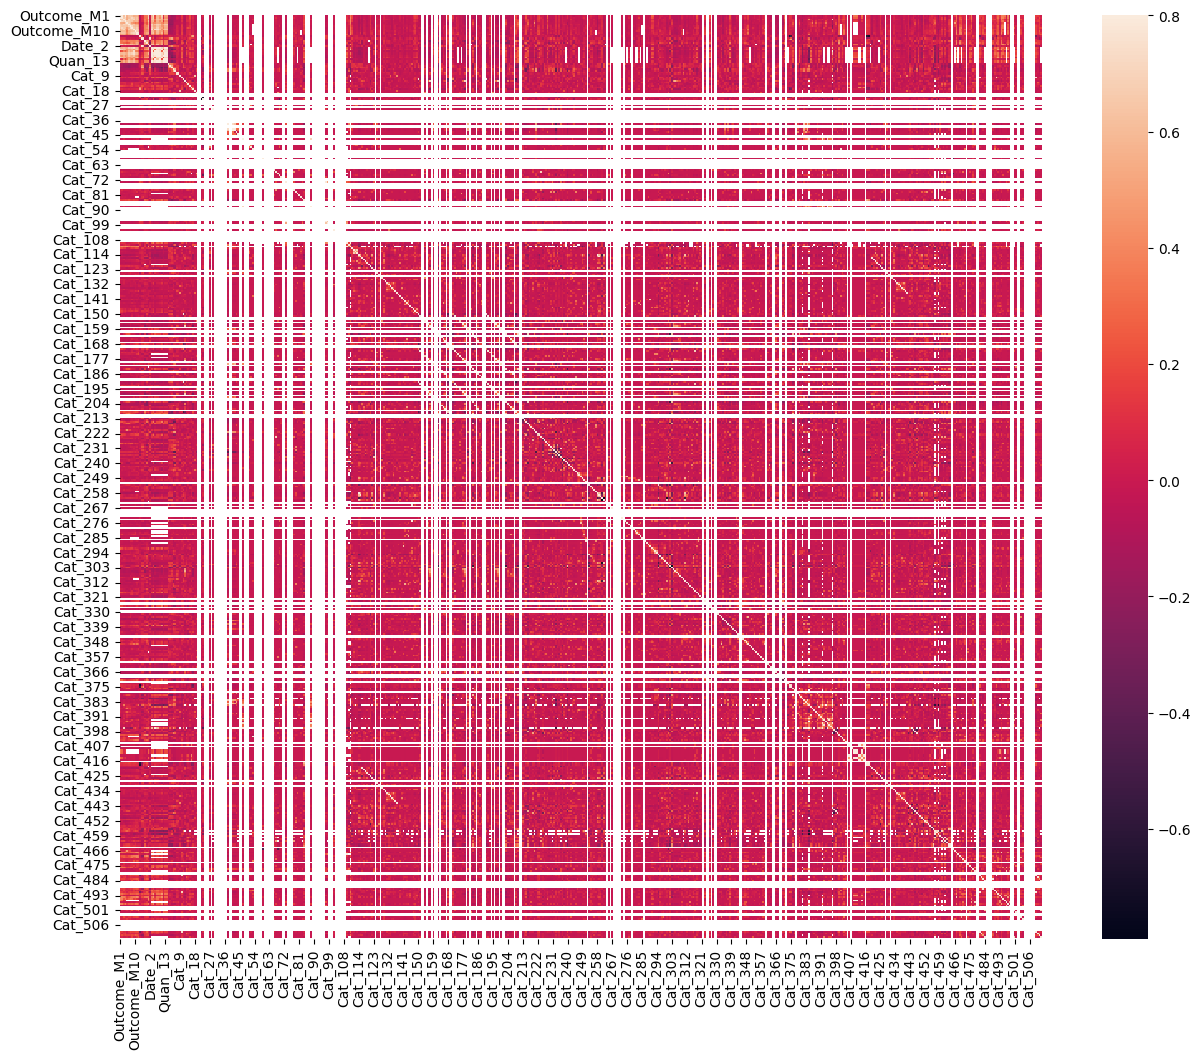

In [37]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

Ahora que tenemos la correlación entre los datos, los filtraremos para reconocer los valores que tienen una relación más fuerte con los Outcome_X.

(La función ".corr()" nos proporciona una matriz con valores entre 0 y 1. En este ejemplo, aplicamos un filtro a los valores mayores de 0.7 para tener una primera aproximación a los datos más relevantes).

In [43]:
relacion = {}
for i in df1:
    lista = []
    for j in df2:
        if abs(corrmat[i][j])>0.7:
            lista.append(j)
    if lista:
        relacion[i] = lista

relacion

{'Outcome_M1': ['Quan_6'],
 'Outcome_M2': ['Quan_4'],
 'Outcome_M3': ['Quan_22'],
 'Outcome_M9': ['Quan_5', 'Quan_7', 'Quan_8', 'Quan_9']}

Como se puede observar en el mapa de calor anterior, las áreas más claras indican una relación más fuerte entre las columnas de nuestros datos. Gracias al filtro creado, podemos apreciar mejor esta relación e incursionar en el análisis individual de cada columna.

Dado que el dataframe es muy grande [751 filas x 558 columnas], realizar un análisis gráfico minucioso (por ejemplo, "Outcome_X vs. (Cat_X o Quan_X)") de manera manual sería una tarea larga y poco efectiva. Sin embargo, gracias al diccionario que hemos generado a través del análisis de correlación, ahora disponemos de un punto de partida sólido para abordar esta tarea de manera más eficiente y enfocada.


**Graficas Outcome_MX Vs (Cat_X, Quan_X)** de los datos con mayor correlacion encontrados anteriormente

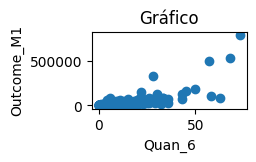

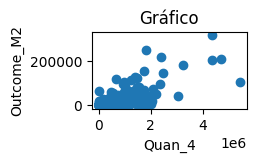

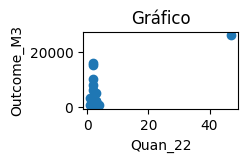

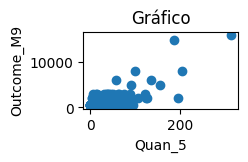

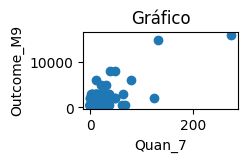

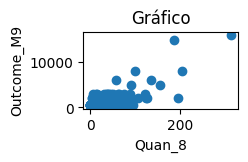

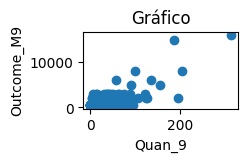

In [39]:
for i in relacion.keys():
    for j in relacion[i]:
        plt.figure(figsize=(2,1))
        plt.scatter(df[j],df[i])
        plt.title('Gráfico')
        plt.xlabel(f'{j}')
        plt.ylabel(f'{i}')
        plt.show()

Graficas relevantes Outcome_MX Vs (Date_1 y Date_2)

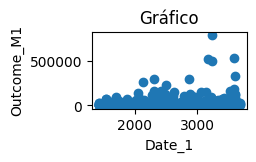

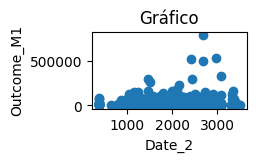

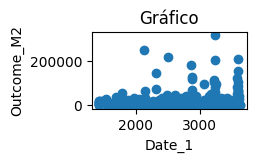

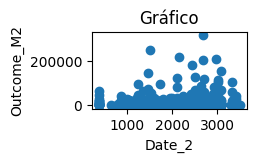

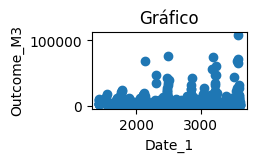

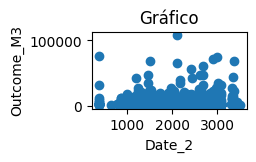

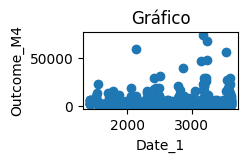

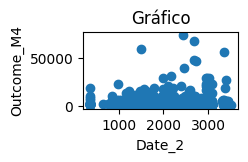

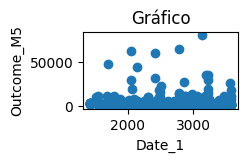

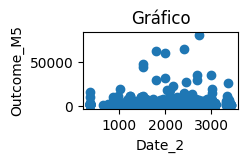

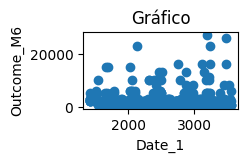

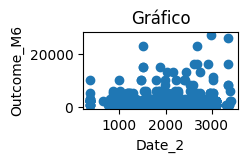

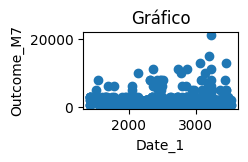

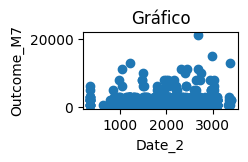

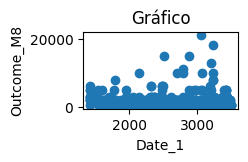

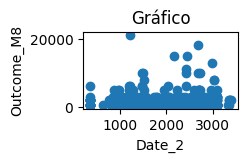

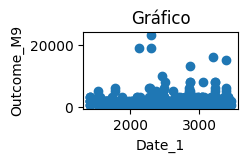

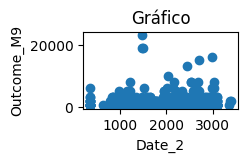

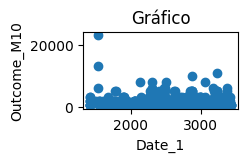

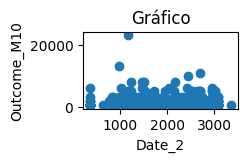

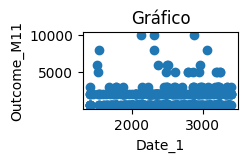

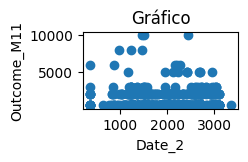

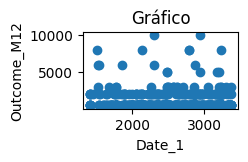

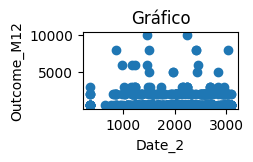

In [40]:
for i in df1:
    for j in ["Date_1","Date_2"]:
        plt.figure(figsize=(2,1))
        plt.scatter(df[j],df[i])
        plt.title('Gráfico')
        plt.xlabel(f'{j}')
        plt.ylabel(f'{i}')
        plt.show()

en este primer analisis nos damos cuenta que las graficas cumplen con nuestras necesidades, muestran una relacion clara entre las variables de interes, por lo tanto nuestro analisis aplicado puede funcionar para la siguiente etapa del proyecto, ademas nos damos cuenta que sin el manejo de valores nulos el .corr() nos puede arroja correlaciones erroneas, por lo que es necesario filtrar antes